## Entertainer Data Analysis

Mahua Dwivedi - UM20230918

### Problem Statemet :
##### Normal life can be stressful, and people need to relax. Being entertained by others is a wonderful way to take some time out of life. It can reduce stress and make life's issues easier to face. The media and entertainment industry consists of film, television, radio and print. These segments include movies, TV shows, radio shows, news, music, newspapers, magazines, and books. The entertainment industry is a group of sub-industries devoted to entertainment. The entertainment industry is used to describe the mass media companies that control the distribution and manufacture of mass media entertainment.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\mahua\INTERNSHIPS\Unified Mentor\Project 1\Entertainer Data Analysis.csv')

In [3]:
data.head(5)

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations
0,Adele,F,Singer,1988,NaN,2008,19,2009.0,1,15,0,16,32,64
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174
2,Aretha Franklin,F,Singer,1942,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,0,20,0,9,29,67
3,Bette Davis,F,Actor,1908,1989.0,1934,Of Human Bondage,1935.0,2,0,1,31,34,57
4,Betty White,F,Actor,1922,NaN,1952,Life with Elilzabeth,1976.0,0,2,5,32,39,79


In [4]:
gender_count=data['Gender (traditional)'].value_counts()
gender_count

M    50
F    20
Name: Gender (traditional), dtype: int64

([<matplotlib.patches.Wedge at 0x23307588a00>,
 [Text(-0.6858388280562522, 0.8600145940217683, 'Male'),
  Text(0.6858389085766268, -0.8600145298088989, 'Female')],
 [Text(-0.37409390621250116, 0.469098869466419, '71.4%'),
  Text(0.37409395013270547, -0.4690988344412175, '28.6%')])

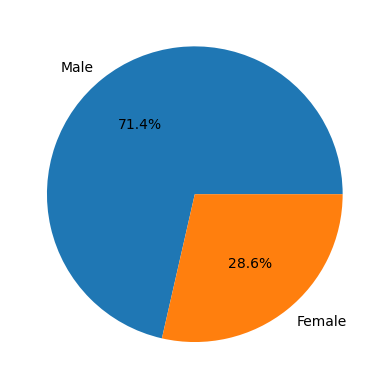

In [5]:
plt.pie(gender_count,labels=['Male','Female'],autopct="%1.1f%%")

In [6]:
prof_count=data['Profession'].value_counts()
prof_count

Actor     48
Singer    22
Name: Profession, dtype: int64

([<matplotlib.patches.Wedge at 0x23307e38ac0>,
 [Text(-0.6059867336244251, 0.9180305434304461, 'Actor'),
  Text(0.605986819576645, -0.9180304866938696, 'Singer')],
 [Text(-0.3305382183405955, 0.5007439327802432, '68.6%'),
  Text(0.33053826522362456, -0.5007439018330196, '31.4%')])

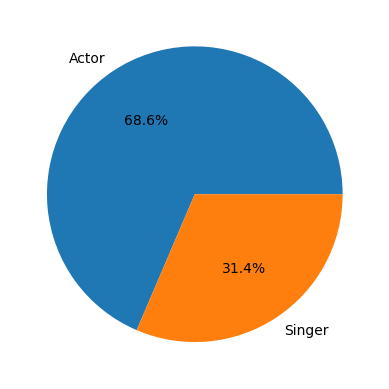

In [7]:
plt.pie(prof_count,labels=['Actor','Singer'],autopct="%1.1f%%")

<Axes: xlabel='Gender (traditional)', ylabel='count'>

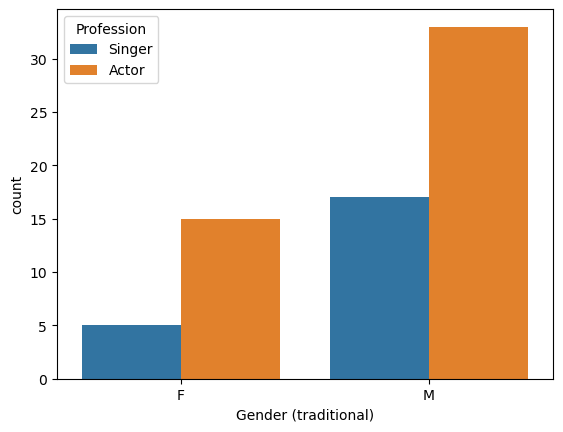

In [8]:
sns.countplot(x=data['Gender (traditional)'],hue=data['Profession'])

### Ones with maximum awards based on basic categorization

In [9]:
idx=data.groupby('Gender (traditional)')['Total Awards won'].idxmax()
data.loc[idx]

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations
53,Meryl Streep,F,Actor,1949,NaN,1978,The Deer Hunter,1980.0,3,0,3,171,177,540
47,Leonardo DiCaprio,M,Actor,1974,NaN,1997,Titanic,2016.0,1,0,0,100,101,355


##### >> Grouping in terms of gender: 
- Among male entertainers 'Leonardo DiCaprio' has max awards.
- Among female entertainers 'Meryl Streep' has max awards.

In [10]:
col=data.groupby('Profession')['Total Awards won'].idxmax()
data.loc[col]

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations
53,Meryl Streep,F,Actor,1949,NaN,1978,The Deer Hunter,1980.0,3,0,3,171,177,540
50,Mariah Carey,F,Singer,1969,NaN,1990,Mariah Carey,1991.0,0,6,0,69,75,208


##### >> Grouping in terms of Profession: 
- Among singers 'Mariah Carey' has max awards.
- Among actors 'Meryl Streep' has max awards.

In [11]:
win=data['Total Awards won'].idxmax()
data.loc[win]

Entertainer                           Meryl Streep
Gender (traditional)                             F
Profession                                   Actor
Birth_Year                                    1949
Year_of_Death                                  NaN
Award_Nomination                              1978
Breakthrough_Name                  The Deer Hunter
Year_of_First_Oscar/Grammy/Emmy             1980.0
Oscar Won                                        3
Grammy Won                                       0
Emmy Won                                         3
Other Awards                                   171
Total Awards won                               177
Total Nominations                              540
Name: 53, dtype: object

##### >> Overall, maximum awards are won by Meryl Streep.

### One with most Grammies
- Grammy is received by the contributors into the field of music.

In [12]:
grammy=data['Grammy Won'].idxmax()
data.loc[grammy]

Entertainer                        Stevie Wonder
Gender (traditional)                           M
Profession                                Singer
Birth_Year                                  1950
Year_of_Death                                NaN
Award_Nomination                            1963
Breakthrough_Name                     Fingertips
Year_of_First_Oscar/Grammy/Emmy           1973.0
Oscar Won                                      1
Grammy Won                                    24
Emmy Won                                       0
Other Awards                                  12
Total Awards won                              37
Total Nominations                             99
Name: 64, dtype: object

##### >> Maximum grammy's are won by Stevie Wonder

### One with most Emmies
- Emmy is awarded for artistic and technical merit for the American and international television industry

In [13]:
emmy=data['Emmy Won'].idxmax()
data.loc[emmy]

Entertainer                           Oprah Winfrey
Gender (traditional)                              F
Profession                                    Actor
Birth_Year                                     1954
Year_of_Death                                   NaN
Award_Nomination                               1985
Breakthrough_Name                  The Color Purple
Year_of_First_Oscar/Grammy/Emmy              1987.0
Oscar Won                                         0
Grammy Won                                        0
Emmy Won                                         18
Other Awards                                     35
Total Awards won                                 53
Total Nominations                               145
Name: 56, dtype: object

##### >> Among all entertainers Oprah Winfrey has most Emmy's.

### One with most Oscars
- Oscars are awards for artistic and technical merit for the film industry.

In [14]:
oscar=data['Oscar Won'].idxmax()
data.loc[oscar]

Entertainer                        Katherine Hepburn
Gender (traditional)                               F
Profession                                     Actor
Birth_Year                                      1907
Year_of_Death                                 2003.0
Award_Nomination                                1933
Breakthrough_Name                      Morning Glory
Year_of_First_Oscar/Grammy/Emmy               1933.0
Oscar Won                                          4
Grammy Won                                         0
Emmy Won                                           1
Other Awards                                      23
Total Awards won                                  28
Total Nominations                                 65
Name: 42, dtype: object

###### >> Most Oscars are won by Katherine Hepburn.

### Apart from Emmy, Grammy and Oscar, there exist other awards.
- Other awards may include BAFTA, etc.

In [15]:
other=data['Other Awards'].idxmax()
data.loc[other]

Entertainer                           Meryl Streep
Gender (traditional)                             F
Profession                                   Actor
Birth_Year                                    1949
Year_of_Death                                  NaN
Award_Nomination                              1978
Breakthrough_Name                  The Deer Hunter
Year_of_First_Oscar/Grammy/Emmy             1980.0
Oscar Won                                        3
Grammy Won                                       0
Emmy Won                                         3
Other Awards                                   171
Total Awards won                               177
Total Nominations                              540
Name: 53, dtype: object

##### >> Other awards are most won by Meryl Streep

### Finding the EGOT title holders
- EGOT is a title given to the one who has all Emmy Grammy Oscar and Tony award. As we do not have data of the Tony award winners. We can analyse with respect t the first three awards viz. Emmy, Grammy and Oscar.

In [16]:
col=['Emmy Won','Grammy Won','Oscar Won']

egot=data[(data[col]!= 0)]
egot=egot.dropna()
egot

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations


##### >> This implies that in our dataset there is no one who has all three awards

### Person with most nominations

In [17]:
nom=data['Total Nominations'].idxmax()
data.loc[nom]

Entertainer                           Meryl Streep
Gender (traditional)                             F
Profession                                   Actor
Birth_Year                                    1949
Year_of_Death                                  NaN
Award_Nomination                              1978
Breakthrough_Name                  The Deer Hunter
Year_of_First_Oscar/Grammy/Emmy             1980.0
Oscar Won                                        3
Grammy Won                                       0
Emmy Won                                         3
Other Awards                                   171
Total Awards won                               177
Total Nominations                              540
Name: 53, dtype: object

##### >> Meryl Streep again tops the list with maximum nominations.

### To come to a conclusion for who is the best entertainer there can be two approaches:
- By ranking them in order of the total accolades or honors received by them.
- By finding the win percentage of the entertainer.

### Approach 1
#### We here note that the top entertainers would be ones who have most awards as well as most nominations i.e. one who has most accolades or honors

In [18]:
data['Total Accolades']=data['Total Awards won']+data['Total Nominations']
data

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades
0,Adele,F,Singer,1988,NaN,2008,19,2009.0,1,15,0,16,32,64,96
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174,232
2,Aretha Franklin,F,Singer,1942,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,0,20,0,9,29,67,96
3,Bette Davis,F,Actor,1908,1989.0,1934,Of Human Bondage,1935.0,2,0,1,31,34,57,91
4,Betty White,F,Actor,1922,NaN,1952,Life with Elilzabeth,1976.0,0,2,5,32,39,79,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,Actor,1956,NaN,1984,Splash,1993.0,2,0,7,82,91,290,381
66,Tony Bennett,M,Singer,1926,NaN,1951,Because of You,1963.0,0,20,2,2,24,55,79
67,Wayne Newton,M,Actor,1942,NaN,1972,"Daddy, Don't You Walk So Fast",NaN,0,0,0,1,1,4,5
68,Will Smith,M,Actor,1968,NaN,1990,The Fresh Prince of Bel-Air,1988.0,0,4,0,66,70,231,301


In [19]:
top10=data.nlargest(10, 'Total Accolades')
top10=pd.DataFrame(top10)
top10

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades
53,Meryl Streep,F,Actor,1949,NaN,1978,The Deer Hunter,1980.0,3,0,3,171,177,540,717
47,Leonardo DiCaprio,M,Actor,1974,NaN,1997,Titanic,2016.0,1,0,0,100,101,355,456
65,Tom Hanks,M,Actor,1956,NaN,1984,Splash,1993.0,2,0,7,82,91,290,381
16,Denzel Washington,M,Actor,1954,NaN,1989,Glory,1989.0,2,0,0,84,86,273,359
45,Lady Gaga,F,Singer,1986,NaN,2008,The Fame,2010.0,1,12,0,55,68,239,307
40,Johnny Depp,M,Actor,1963,NaN,1987,21 Jump Street,NaN,0,0,0,73,73,232,305
68,Will Smith,M,Actor,1968,NaN,1990,The Fresh Prince of Bel-Air,1988.0,0,4,0,66,70,231,301
50,Mariah Carey,F,Singer,1969,NaN,1990,Mariah Carey,1991.0,0,6,0,69,75,208,283
41,Justin Timberlake,M,Singer,1981,NaN,2000,No Strings Attached,2004.0,0,10,4,41,55,185,240
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174,232


<Axes: xlabel='Entertainer', ylabel='Total Accolades'>

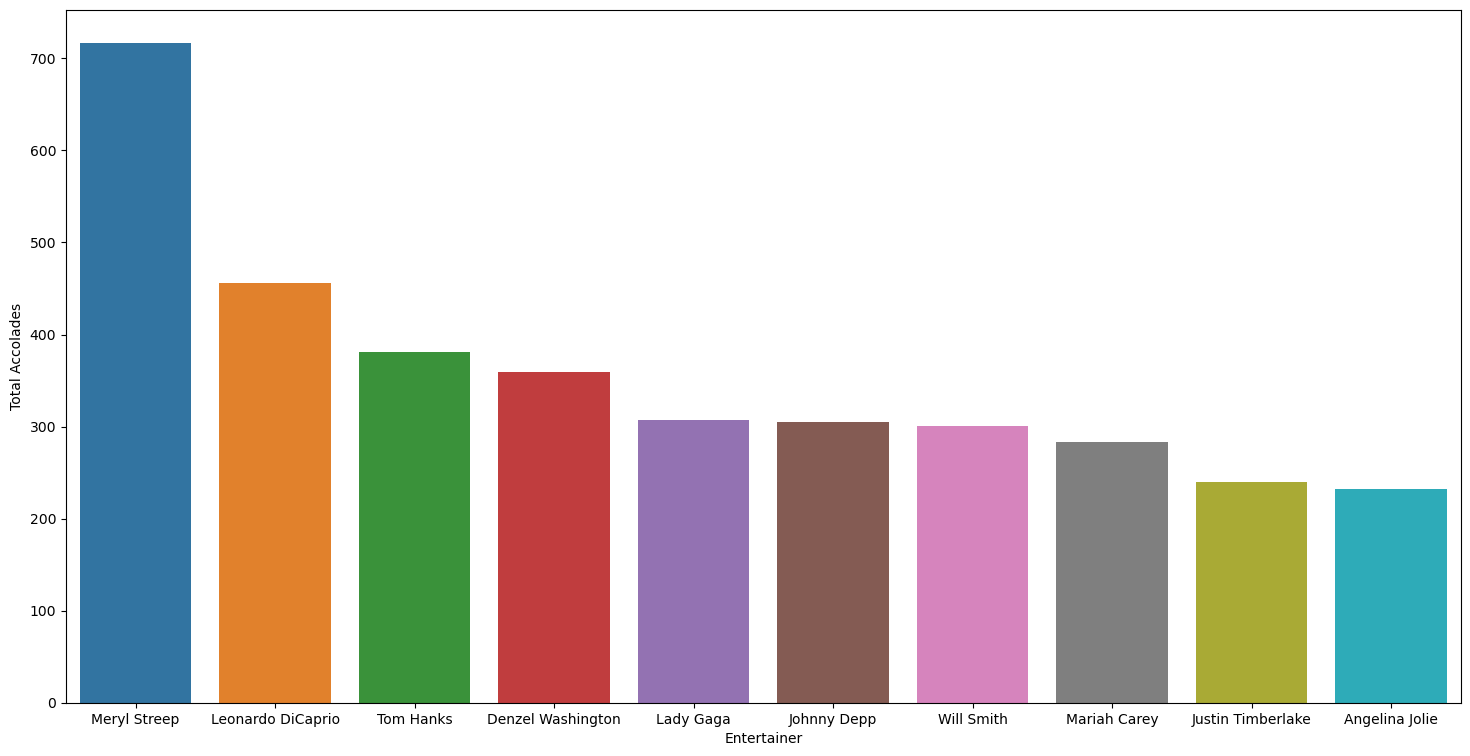

In [20]:
plt.figure(figsize=(18,9))
sns.barplot(x=top10['Entertainer'],y=top10['Total Accolades'],data=top10)

### Approach 2
#### Here, we calculate the win percentage of the Entertainers.

In [21]:
data['Win percentage']=(data['Total Awards won']/data['Total Accolades'])*100

In [22]:
data.head(3)

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades,Win percentage
0,Adele,F,Singer,1988,NaN,2008,19,2009.0,1,15,0,16,32,64,96,33.333333
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174,232,25.000000
2,Aretha Franklin,F,Singer,1942,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,0,20,0,9,29,67,96,30.208333


### Creating an eligibility criteria... Hence knowing the skewness is important

In [23]:
column_skewness=skew(data['Total Accolades'])
column_skewness

2.304000939244381

In [24]:
# Interpret the skewness
if column_skewness > 0:
    skewness_label = 'Right-skewed'
elif column_skewness < 0:
    skewness_label = 'Left-skewed'
else:
    skewness_label = 'Symmetric'

print(f"The skewness of the column is {column_skewness:.2f}, indicating a {skewness_label} distribution.")

The skewness of the column is 2.30, indicating a Right-skewed distribution.


<Axes: xlabel='Total Accolades', ylabel='Density'>

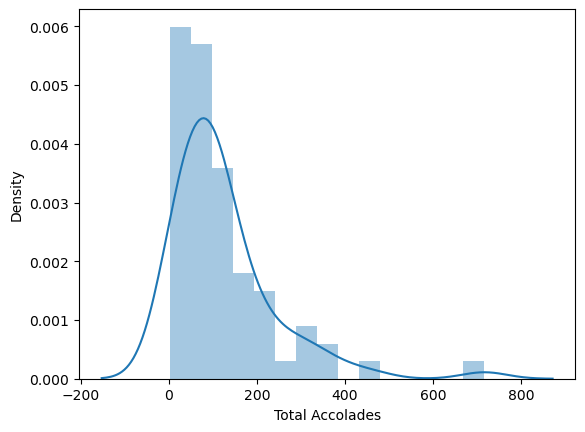

In [25]:
sns.distplot(data['Total Accolades'])

### For a right-skewed distribution, we consider using the median as a threshold or reference point

In [26]:
data['Total Accolades'].median()

94.0

### Eligiblity criteria i.e. threshold is set where entertainers atleast have *94* accolades.

In [27]:
threshold=94

In [28]:
data['Eligible Candidate']=False
data.head()

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades,Win percentage,Eligible Candidate
0,Adele,F,Singer,1988,NaN,2008,19,2009.0,1,15,0,16,32,64,96,33.333333,False
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174,232,25.000000,False
2,Aretha Franklin,F,Singer,1942,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,0,20,0,9,29,67,96,30.208333,False
3,Bette Davis,F,Actor,1908,1989.0,1934,Of Human Bondage,1935.0,2,0,1,31,34,57,91,37.362637,False
4,Betty White,F,Actor,1922,NaN,1952,Life with Elilzabeth,1976.0,0,2,5,32,39,79,118,33.050847,False


In [29]:
data['Eligible Candidate'] = data['Total Accolades'] >= threshold
data

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades,Win percentage,Eligible Candidate
0,Adele,F,Singer,1988,NaN,2008,19,2009.0,1,15,0,16,32,64,96,33.333333,True
1,Angelina Jolie,F,Actor,1975,NaN,1999,"Girl, Interrupted",1999.0,1,0,0,57,58,174,232,25.000000,True
2,Aretha Franklin,F,Singer,1942,NaN,1967,I Never Loved a Man (The Way I Love You),1968.0,0,20,0,9,29,67,96,30.208333,True
3,Bette Davis,F,Actor,1908,1989.0,1934,Of Human Bondage,1935.0,2,0,1,31,34,57,91,37.362637,False
4,Betty White,F,Actor,1922,NaN,1952,Life with Elilzabeth,1976.0,0,2,5,32,39,79,118,33.050847,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Tom Hanks,M,Actor,1956,NaN,1984,Splash,1993.0,2,0,7,82,91,290,381,23.884514,True
66,Tony Bennett,M,Singer,1926,NaN,1951,Because of You,1963.0,0,20,2,2,24,55,79,30.379747,False
67,Wayne Newton,M,Actor,1942,NaN,1972,"Daddy, Don't You Walk So Fast",NaN,0,0,0,1,1,4,5,20.000000,False
68,Will Smith,M,Actor,1968,NaN,1990,The Fresh Prince of Bel-Air,1988.0,0,4,0,66,70,231,301,23.255814,True


In [30]:
best=data.groupby("Eligible Candidate")['Win percentage'].idxmax()
data.loc[best][data['Eligible Candidate']]

,Entertainer,Gender (traditional),Profession,Birth_Year,Year_of_Death,Award_Nomination,Breakthrough_Name,Year_of_First_Oscar/Grammy/Emmy,Oscar Won,Grammy Won,Emmy Won,Other Awards,Total Awards won,Total Nominations,Total Accolades,Win percentage,Eligible Candidate
46,Leonard Bernstein,M,Singer,1918,1990.0,1957,West Side Story,1962.0,0,17,7,31,55,82,137,40.145985,True


### *OBSERVATION*:
 - Most Grammies are won by Stevie Wonder i.e. 24
 - Most Emmies are won by Oprah Winfrey i.e. 18
 - Most Oscars are won by Katherine Hepburn i.e. 4
 - Other awards like BAFTA, etc are most won by Meryl Streep i.e. 171

### *CONCLUSION*:
 - From approach 1 i.e. by most number of accolades, *MERYL STREEP* is the best entertainer.
 - From approach 2 i.e. by calculating the win percentage and creating an eligibility criteria, *Leonard Bernstein* is the best entertainer.